<a href="https://colab.research.google.com/github/rafaellccouto/pos_tech_dengue/blob/main/postech_aula_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postech: Análise de dados da Dengue de 2013 a 2023

In [64]:
#Analise dados Dengue
#Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
#Bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#Base de dados
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')

In [65]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


In [66]:
df_dengue.tail()

,municipio,uf,data_infeccoes,qtd_infeccoes
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


## Explorando a base de dados

In [67]:
print(f'Tamanho da base de dados: {df_dengue.shape}')

Tamanho da base de dados: (728772, 4)


In [68]:
df_dengue.dtypes

municipio                 object
uf                        object
data_infeccoes    datetime64[ns]
qtd_infeccoes              int64
dtype: object

### Existem dados nulos?

In [69]:
df_dengue.isnull()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
728767,False,False,False,False
728768,False,False,False,False
728769,False,False,False,False
728770,False,False,False,False


In [70]:
df_dengue.isnull().sum()

municipio         0
uf                0
data_infeccoes    0
qtd_infeccoes     0
dtype: int64

In [71]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


### Informações sobre a base

In [72]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


### Verificar valores únicos

In [73]:
df_dengue.nunique()

municipio         5243
uf                  27
data_infeccoes     132
qtd_infeccoes     1157
dtype: int64

### Quantidade de pessoas que pegaram dengue por município por ano

In [74]:
#Criar coluna ano
df_dengue['ano'] = pd.DatetimeIndex(df_dengue['data_infeccoes']).year

In [75]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [76]:
infeccoes_municipio = df_dengue.groupby(['ano','municipio','uf'])['qtd_infeccoes'].sum().reset_index()

In [77]:
infeccoes_municipio.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [78]:
infeccoes_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


### Agrupamento por estado e ano

In [79]:
infeccoes_estado = df_dengue.groupby(['ano','uf'])['qtd_infeccoes'].sum().reset_index()

In [80]:
infeccoes_estado.head()

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417


In [81]:
infeccoes_estado.tail()

,ano,uf,qtd_infeccoes
292,2023,RS,27389
293,2023,SC,77954
294,2023,SE,1749
295,2023,SP,198774
296,2023,TO,1232


## Estatítstica descritiva

In [82]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


In [83]:
infeccoes_estado.shape

(297, 3)

### Utilizando o boxplot

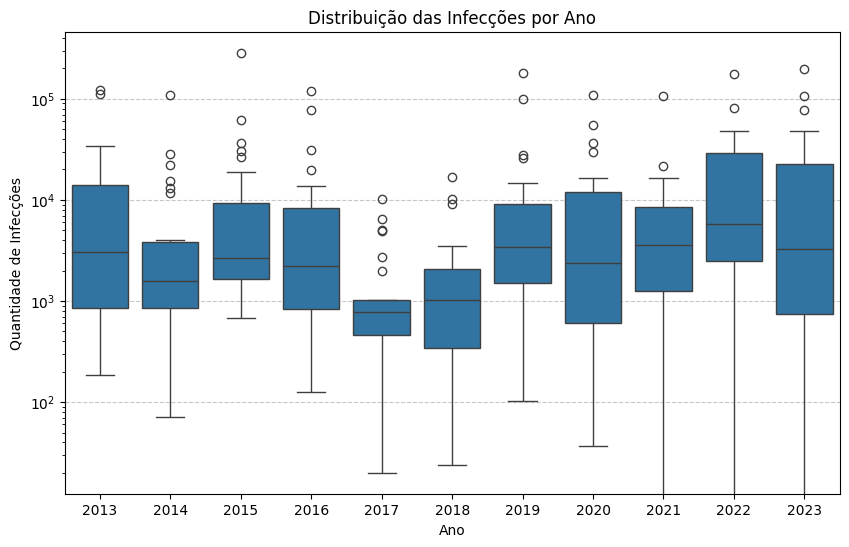

In [84]:
# Cria boxplot comparando as infecções por ano
plt.figure(figsize=(10,6))
sns.boxplot(x='ano', y='qtd_infeccoes', data=infeccoes_estado)
# Personalizações do gráfico
plt.title('Distribuição das Infecções por Ano')
plt.yscale('log')  # Usar escala logarítmica para melhor visualização
plt.xlabel('Ano')
plt.ylabel('Quantidade de Infecções')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
# Filtras os dados para o ano de 2023
infeccoes_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]
infeccoes_2023

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249
275,2023,CE,7437
276,2023,DF,23710
277,2023,ES,0
278,2023,GO,21682
279,2023,MA,2428


### Resumo do ano de 2023

In [86]:
infeccoes_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


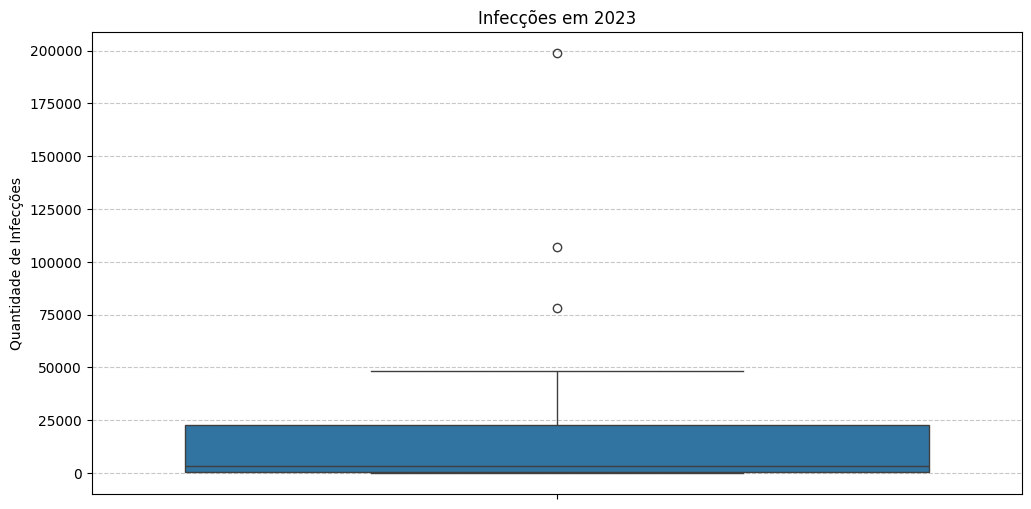

In [87]:
plt.figure(figsize=(12,6))
sns.boxplot(y='qtd_infeccoes', data=infeccoes_2023)
plt.title('Infecções em 2023')
plt.xticks
plt.ylabel('Quantidade de Infecções')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

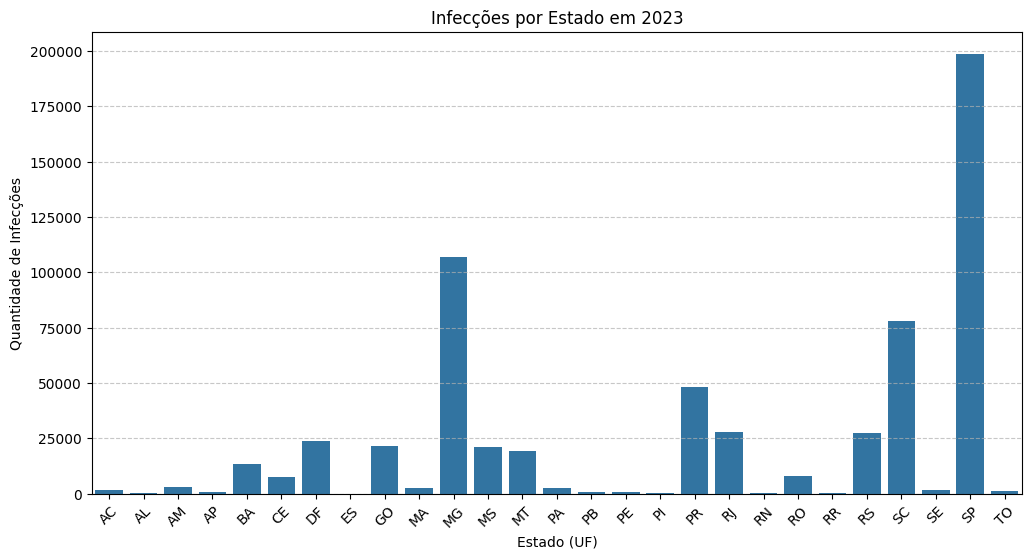

In [88]:
# utilizando o gráfico de barras para visualizar as infecções por estado em 2023
plt.figure(figsize=(12,6))  
sns.barplot(x='uf', y='qtd_infeccoes', data=infeccoes_2023)
plt.title('Infecções por Estado em 2023')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade de Infecções') 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()